# Numerical Integration  

## 1. Problem (Activity 8.1., Heath, Scientific Computing)

Given $\int_0^1 \frac{4}{1+x^2}dx = \pi$, approximate the value for $\pi$ using the midpoint, trapezoid, and Simpson's quadrature rules for various step sizes $h$. 

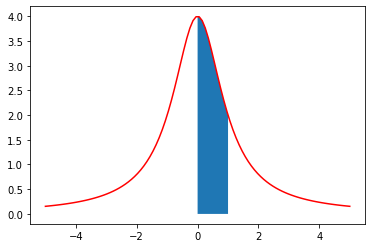

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

def f(x):
    return 4 / (1 + x**2)

x = np.linspace(-5,5,100)
x_bounded = np.linspace(0,1,100)
plt.plot(x, f(x), "r")
plt.fill_between(x_bounded, f(x_bounded))

## 2. Methods and Results

### 2.1 Quadrature Rules

An $n$ quadrature has the form:

$Q_n(f)= \sum_{i=1}^n w_i f(x_i)$ 

where $x_i$ are the abscissas or nodes and $w_i$ are the weights.

In [2]:
def Q(f, w, fx, a, b, h):
    integral = 0
    
    while a < b:
        x1 = a                       
        x2 = a + h                   
        wi = w(x1, x2)               
        fxi = fx(x1, x2)               
        integral += wi * fxi
        a += h 
    
    return integral

def visualize(q, f, a, b, h, decr):
    step_sizes = []
    approximates = []
    
    while h >= 0:
        step_sizes.append(h)
        approximates.append(q(f, a, b, h))
        h -= decr

    plt.axhline(y=math.pi, color='r', linestyle='-')
    plt.plot(step_sizes, approximates, "-o")
    plt.legend(["pi", "approx. for pi"])
    plt.xlabel("h (step size)")
    plt.ylabel("approx. integral")

### 2.2 Midpoint Rule

$M(f) = (b-a)f((a+b)/2)$

- Weight: $w_i = b_i - a_i$
- Node: $x_i = (a_i+b_i) / 2$

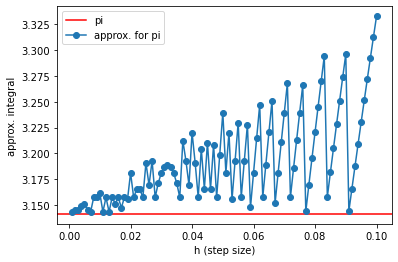

In [16]:
def M(f, a, b, h):
    # Midpoint Rule
    w = lambda x1, x2: x2 - x1       
    fx = lambda x1, x2: f((x1 + x2) / 2)
    return Q(f, w, fx, a, b, h)
    
visualize(q=M, f=f, a=0, b=1, h=0.1, decr=0.001)

### 2.3 Trapezoid Rule

$T(f) = \frac{b-a}{2}(f(a) + f(b))$

- Weight: $w_i = \frac{b-a}{2}$
- Node: $x_i = f(a) + f(b)$

3.1415759869231317

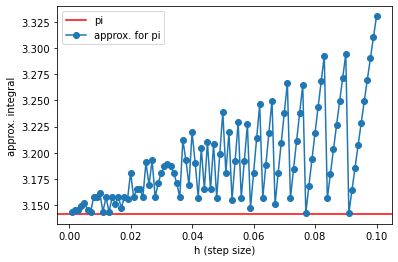

In [10]:
def T(f, a, b, h):
    # Trapezoid Rule  
    w = lambda x1, x2: (x2 - x1) / 2       
    fx = lambda x1, x2: f(x1) + f(x2)      
    return Q(f, w, fx, a, b, h)

visualize(q=T, f=f, a=0, b=1, h=0.1, decr=0.001)
T(f, a=0,b=1,h=0.01)

### 2.4 Simpson's Rule

$T(f) = \frac{b-a}{6}(f(a) + 4f(\frac{a + b}{2}) + f(b))$

- Weight: $w_i = \frac{b-a}{6}$
- Node: $x_i = f(a) + 4f(\frac{a + b}{2}) + f(b)$

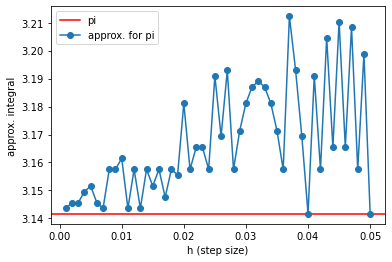

In [13]:
def S(f, a, b, h):
    # Simpson's Rule  
    w = lambda x1, x2: (x2 - x1) / 6                      
    fx = lambda x1, x2: f(x1) + 4 * f((x1+x2)/2) + f(x2)   
    return Q(f, w, fx, a, b, h)

visualize(q=S, f=f, a=0, b=1, h=0.05, decr=0.001)

### 2.5 Romberg Integration

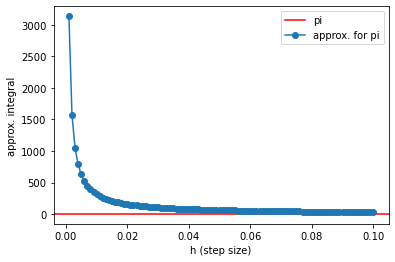

In [14]:
from scipy import integrate

def R(f, a, b, h):
    w = lambda x1, x2: integrate.romberg(f, a, b, divmax=1)
    x = lambda x1, x2: 1
    return Q(f, w, x, a, b, h)

visualize(q=R, f=f, a=0, b=1, h=0.1, decr=0.001)

### 2.5 Accuracy Comparison

#### h = 1

[0.05840734641020706, 0.14159265358979312, 0.008259320256459812, 0.008259320256459812]


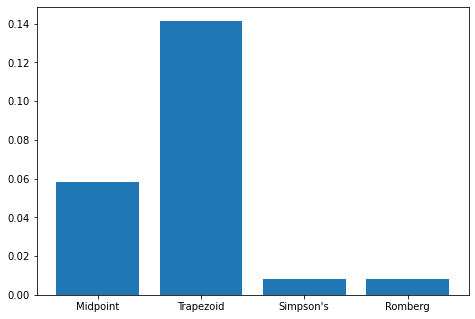

In [15]:
error_value = lambda x: np.abs(math.pi - x)

a = 0
b = 1
h = 1

# Error
m = error_value(M(f, a, b, h))
t = error_value(T(f, a, b, h))
s = error_value(S(f, a, b, h))
r = error_value(integrate.romberg(f, a, b, divmax=1))
error = [m, t, s, r]

print(error)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
legend = ["Midpoint", "Trapezoid", "Simpson's", "Romberg"]
ax.bar(legend, error)
plt.show()

#### h = 0.1

[0.19108303414614358, 0.18883107287392686, 0.19033238038873845, 4.845102097306153e-11]


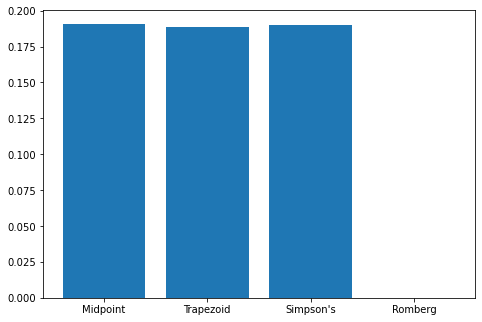

In [19]:
error_value = lambda x: np.abs(math.pi - x)

a = 0
b = 1
h = 0.1

# Error
m = error_value(M(f, a, b, h))
t = error_value(T(f, a, b, h))
s = error_value(S(f, a, b, h))
r = error_value(integrate.romberg(f, a, b, divmax=10)) # divmax = Maximum order of extrapolation.
error = [m, t, s, r]

print(error)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
legend = ["Midpoint", "Trapezoid", "Simpson's", "Romberg"]
ax.bar(legend, error)
plt.show()

## <center>End</center>